<a href="https://colab.research.google.com/github/LHW001abc/Pearson-correlation-coefficient-and-simple-linear-regression/blob/main/Pearson_correlation_coefficient_and_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv") # real
data.tail()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

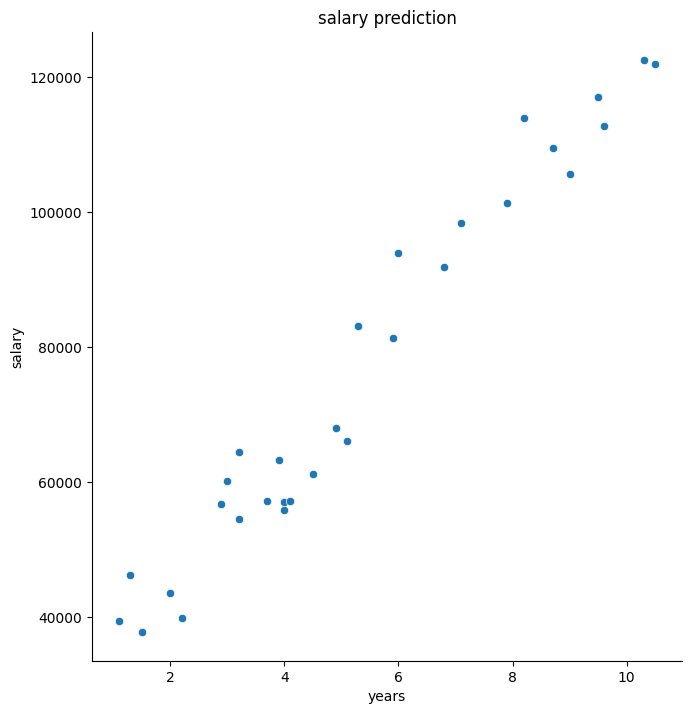

In [3]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()

In [4]:
X = data.iloc[ : , :-1]
y = data.iloc[ : , 1]

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state = 10)

In [9]:
my_model = LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

In [10]:
my_model.score(X_train,y_train)

0.9494673013344646

In [11]:
my_model.score(X_test,y_test)

0.9816423482070253

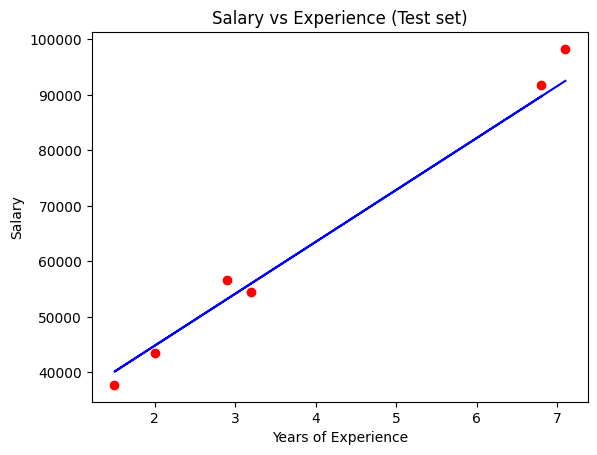

In [12]:
y_pred = my_model.predict(X_test)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

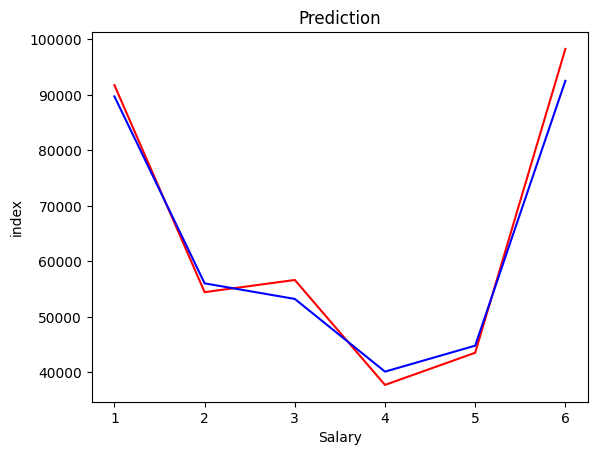

In [13]:
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

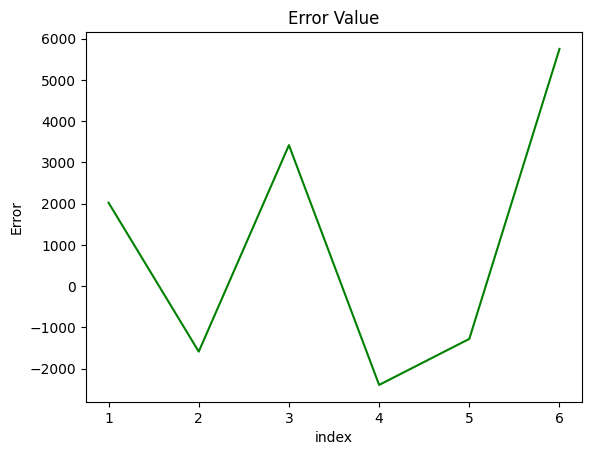

In [14]:
# plotting the error
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [15]:
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 9785570.138914324
r square : 0.9816423482070253


In [16]:
# Intecept and coeff of the line
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

y_hat = 9356 * 4.5 +  26089
print(y_hat)

Intercept of the model: 26089.09663241673
Coefficient of the line: [9356.86299354]
68191.0
